In [53]:
%pip install scikit-learn pandas matplotlib seaborn imbalanced-learn scipy

Note: you may need to restart the kernel to use updated packages.


# Relatório de pré processamento do pi 6 semestre
### Este documento tem como finalidade explicar como foi realizado o pré processamento da base do pi

Aluno: Késsia Rodrigues Borges

A base utilizada é uma base com dados de pessoas diabéticas(2), não diabéticas(0) e pré diabéticas(1)
O objetivo do trabalho final é obter uma recomendação confiável, onde com base nos dados inputados pelo usuário, possa classificá-lo e recomendar bons hábitos

---

### 1. Inicialização e definição de atributos

```python
class PreProcessor:
    def __init__(self, path='diabetes_012_health_indicators_BRFSS2015.csv'):
        self.path = path
        self.colunas_irrelevantes = ['AnyHealthcare', 'NoDocbcCost', 'Income', 'Education']
        self.scaler = StandardScaler()
        self.df = pd.read_csv(self.path)
```

* **`self.path`**: caminho do arquivo de entrada.
* **`self.colunas_irrelevantes`**: lista das features que serão removidas por baixa relevância, baseada em análise de correlação.
* **`self.scaler`**: instância do `StandardScaler`, que normaliza as features para média 0 e desvio padrão 1.
* **`self.df`**: DataFrame com os dados carregados do arquivo CSV.

---

### 2. Análise de correlação

```python
def correlation(self):
    correlacao = self.df.corr()
    plt.figure(figsize=(14, 10))
    sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
    plt.title('Matriz de Correlação da Base de Diabetes')
    plt.show()
```

* **`self.df.corr()`**: calcula a matriz de correlação de Pearson entre todas as colunas numéricas do DataFrame.
* **Heatmap**: visualiza rapidamente relações lineares entre atributos e a variável alvo (`Diabetes_012`), embasando a exclusão de variáveis irrelevantes.

---

### 3. Pré-processamento e limpeza

```python
def pre_process(self, arquivo_saida):
    self.correlation()
    self.df = self.df.drop(columns=self.colunas_irrelevantes)
    valores_nulos = self.df.isnull().sum()
    print(valores_nulos)
    X = self.df.drop('Diabetes_012', axis=1)
    y = self.df['Diabetes_012']
    X_norm = self.scaler.fit_transform(X)
    self.df_normalizado = pd.DataFrame(X_norm, columns=X.columns)
    self.df_normalizado['Diabetes_012'] = y.reset_index(drop=True)
    self.df_normalizado.to_csv(arquivo_saida, index=False)
```

#### **Passos detalhados:**

1. **`self.correlation()`**: mostra a matriz de correlação antes da remoção das colunas.
2. **Remoção das colunas irrelevantes**: `self.df.drop(columns=self.colunas_irrelevantes)` elimina variáveis que não contribuem para a predição.
3. **Checagem de valores nulos**: `self.df.isnull().sum()` exibe a contagem de nulos por coluna, auxiliando na identificação de inconsistências.
4. **Separação de variáveis**:

   * `X = self.df.drop('Diabetes_012', axis=1)`: atributos preditores.
   * `y = self.df['Diabetes_012']`: variável alvo.
5. **Normalização**:

   * `self.scaler.fit_transform(X)` ajusta os dados para média 0 e desvio padrão 1, fundamental para métodos baseados em distância como KNN.
6. **Criação do DataFrame final**:

   * Junta os dados normalizados e a coluna alvo em um novo DataFrame.
7. **Exportação**:

   * `to_csv(arquivo_saida, index=False)` salva o resultado em CSV pronto para modelagem.



In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

class PreProcessor:
	def __init__(self, path='diabetes_012_health_indicators_BRFSS2015.csv'):
			self.path = path
			self.colunas_irrelevantes = ['AnyHealthcare', 'NoDocbcCost', 'Income', 'Education']
			self.scaler = StandardScaler()
			self.df = pd.read_csv(self.path)

	def correlation(self): 
		# Aqui é exibida a matriz de correlação para julgar se faz sentido as colunas que serão excluídas, 
		# Com base nos dados obtidos no gráfico, remover as colunas ['AnyHealthcare', 'NoDocbcCost', 'Income', 'Education'] faz sentido
		correlacao = self.df.corr()
		plt.figure(figsize=(14, 10))
		sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
		plt.title('Matriz de Correlação da Base de Diabetes')
		plt.show()

	def pre_process(self, arquivo_saida): 
		# Exibe a correlação
		self.correlation()
		# Remove as colunas irrelevantes
		self.df = self.df.drop(columns=self.colunas_irrelevantes)
		valores_nulos = self.df.isnull().sum()

		# Exibir valores nulos
		print(valores_nulos)
		# Remove a classe
		X = self.df.drop('Diabetes_012', axis=1)
		y = self.df['Diabetes_012']

		# Verificando quantas instancias tem para cada classe
		print(y.value_counts())

		#Normaliza os dados
		X_norm = self.scaler.fit_transform(X)

		# Salva a base normalizada
		self.df_normalizado = pd.DataFrame(X_norm, columns=X.columns)
		self.df_normalizado['Diabetes_012'] = y.reset_index(drop=True)
		self.df_normalizado.to_csv(arquivo_saida, index=False)






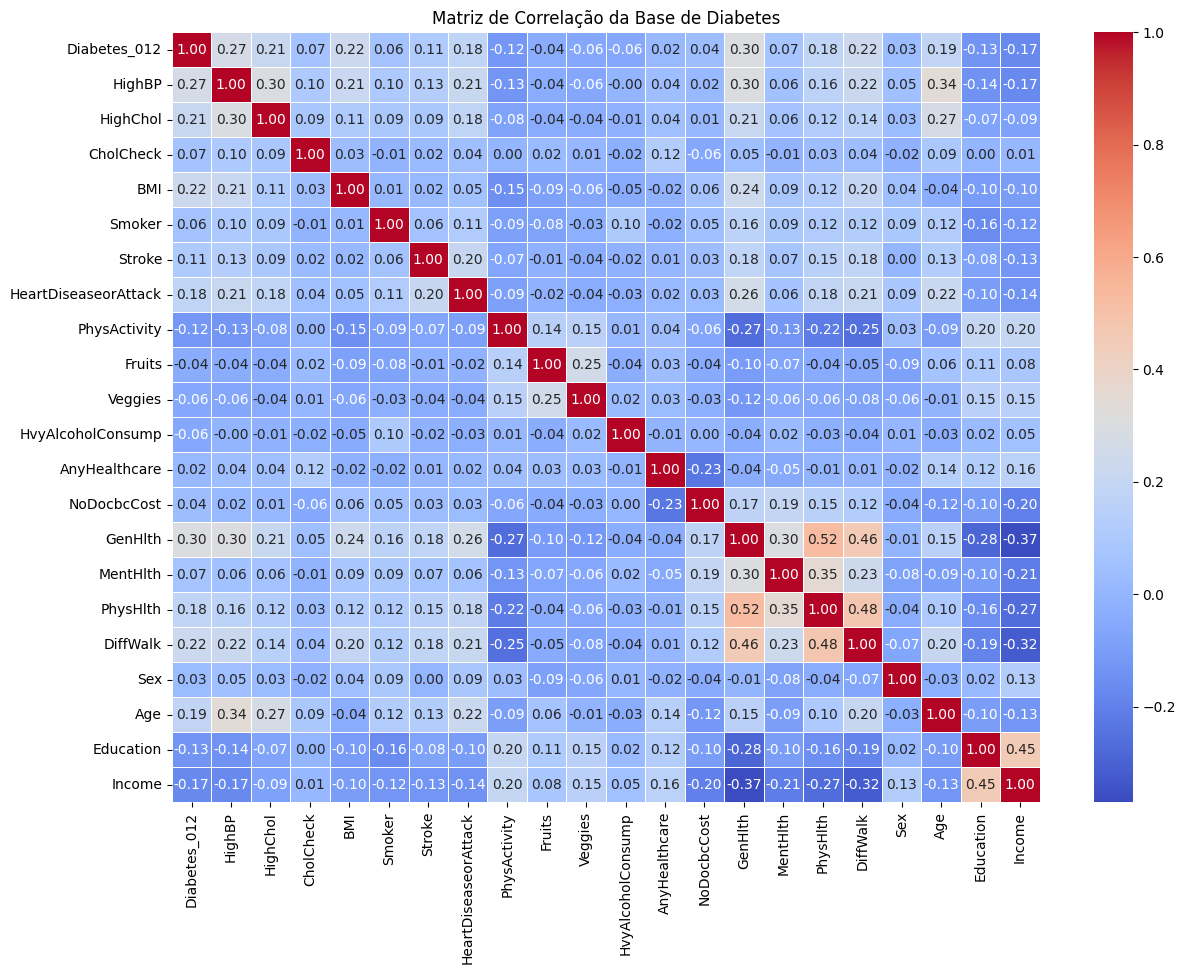

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
dtype: int64
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


In [55]:
pre_processor = PreProcessor()
pre_processor.pre_process("cleaned.csv")

In [56]:
df = pd.read_csv("cleaned.csv")

df.info()
X = df.drop("Diabetes_012", axis=1)
Y = df["Diabetes_012"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                253680 non-null  float64
 1   HighChol              253680 non-null  float64
 2   CholCheck             253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Stroke                253680 non-null  float64
 6   HeartDiseaseorAttack  253680 non-null  float64
 7   PhysActivity          253680 non-null  float64
 8   Fruits                253680 non-null  float64
 9   Veggies               253680 non-null  float64
 10  HvyAlcoholConsump     253680 non-null  float64
 11  GenHlth               253680 non-null  float64
 12  MentHlth              253680 non-null  float64
 13  PhysHlth              253680 non-null  float64
 14  DiffWalk              253680 non-null  float64
 15  

In [57]:

df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Diabetes_012
0,1.153688,1.165254,0.196922,1.757936,1.120927,-0.205637,-0.322458,-1.762814,-1.316872,0.482087,-0.244014,2.329121,1.998592,1.233999,2.223615,-0.887021,0.316900,0.0
1,-0.866785,-0.858182,-5.078164,-0.511806,1.120927,-0.205637,-0.322458,0.567275,-1.316872,-2.074316,-0.244014,0.457294,-0.429630,-0.486592,-0.449718,-0.887021,-0.337933,0.0
2,1.153688,1.165254,0.196922,-0.057858,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,-2.074316,-0.244014,2.329121,3.617407,2.954590,2.223615,-0.887021,0.316900,0.0
3,1.153688,-0.858182,0.196922,-0.209174,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,-0.244014,-0.478619,-0.429630,-0.486592,-0.449718,-0.887021,0.971733,0.0
4,1.153688,1.165254,0.196922,-0.663122,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,-0.244014,-0.478619,-0.024926,-0.486592,-0.449718,-0.887021,0.971733,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.153688,1.165254,0.196922,2.514516,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,0.482087,-0.244014,0.457294,-0.429630,0.086938,-0.449718,1.127369,-0.992766,0.0
253676,1.153688,1.165254,0.196922,-1.571019,-0.892119,-0.205637,-0.322458,-1.762814,-1.316872,-2.074316,-0.244014,1.393207,-0.429630,-0.486592,2.223615,-0.887021,0.971733,2.0
253677,-0.866785,-0.858182,0.196922,-0.057858,-0.892119,-0.205637,-0.322458,0.567275,0.759375,-2.074316,-0.244014,-1.414532,-0.429630,-0.486592,-0.449718,-0.887021,-1.975015,0.0
253678,1.153688,-0.858182,0.196922,-0.814438,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,0.482087,-0.244014,0.457294,-0.429630,-0.486592,-0.449718,1.127369,-0.337933,0.0


In [58]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, Y)

RuntimeError: Scikit-learn array API support was enabled but scipy's own support is not enabled. Please set the SCIPY_ARRAY_API=1 environment variable before importing sklearn or scipy. More details at: https://docs.scipy.org/doc/scipy/dev/api-dev/array_api.html

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=32)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     42712
         1.0       0.02      0.00      0.00       928
         2.0       0.41      0.22      0.29      7096

    accuracy                           0.83     50736
   macro avg       0.43      0.39      0.40     50736
weighted avg       0.79      0.83      0.80     50736

